In [16]:
include("goddard_hermite-Simpson.jl")
include("goddard.jl")
using NLPModels
using NLPModelsIpopt
using NLPModelsJuMP
using SparseArrays
using SuiteSparse

In [95]:
nh = 100
model = rocket_model(nh)
nlp = MathOptNLPModel(model)
# Solve with Ipopt
res = ipopt(nlp)

# Get primal-dual solution
x = res.solution
y = res.multipliers

n = NLPModels.get_nvar(nlp)
m = NLPModels.get_ncon(nlp)

# Build sparse Hessian 
nnzh = NLPModels.get_nnzh(nlp)
Wi, Wj = NLPModels.hess_structure(nlp)
Wz = zeros(nnzh)
NLPModels.hess_coord!(nlp, x, y, Wz)
W = sparse(Wi, Wj, Wz, n, n)

# Build sparse Jacobian 
nnzj = NLPModels.get_nnzj(nlp)
Ji, Jj = NLPModels.jac_structure(nlp)
Jz = zeros(nnzj)
NLPModels.jac_coord!(nlp, x, Jz)
J = sparse(Ji, Jj, Jz, m, n)

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:     1904
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     5001

Total number of variables............................:      405
                     variables with only lower bounds:      203
                variables with lower and upper bounds:      202
                     variables with only upper bounds:        0
Total number of equality constraints.................:      304
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0100031e+00 3.50e-02 1.63e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

304×405 SparseMatrixCSC{Float64, Int64} with 1904 stored entries:
⎡⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠳⡄⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⎤
⎢⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠉⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⎥
⎢⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⎥
⎢⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⢸⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⢸⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⢸⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⢸⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣼⎥
⎢⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⢸⎥
⎢⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⢸⎥
⎢⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⢸⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⢸⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⠀⠀⠀⠀⠀⠀⠀⠀⠹⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣼⎦

In [96]:
using Plots

function normalize_matrix(mat)
    min_val = minimum(mat)
    max_val = maximum(mat)
    (mat .- min_val) ./ (max_val - min_val)
end

function present_Heatmap(Mat)
    norm_matrix = normalize_matrix(Mat)
    heatmap(norm_matrix, color=:grays, xlabel="Columns", ylabel="Rows", title="Matrix Heatmap")
end
j1 = Matrix(J)

304×405 Matrix{Float64}:
  1.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  …   0.0          0.0
  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0      0.0          0.0
  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0      0.0          0.0
  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0      0.0          0.0
 -1.0   1.0   0.0   0.0   0.0   0.0  0.0  0.0      0.0         -0.00250426
  0.0  -1.0   1.0   0.0   0.0   0.0  0.0  0.0  …   0.0         -0.00754662
  0.0   0.0  -1.0   1.0   0.0   0.0  0.0  0.0      0.0         -0.0126416
  0.0   0.0   0.0  -1.0   1.0   0.0  0.0  0.0      0.0         -0.0177594
  0.0   0.0   0.0   0.0  -1.0   1.0  0.0  0.0      0.0         -0.0228714
  0.0   0.0   0.0   0.0   0.0  -1.0  1.0  0.0      0.0         -0.0279516
  ⋮                             ⋮              ⋱               
  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  …   0.0          0.975313
  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0      0.0          0.975194
  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  

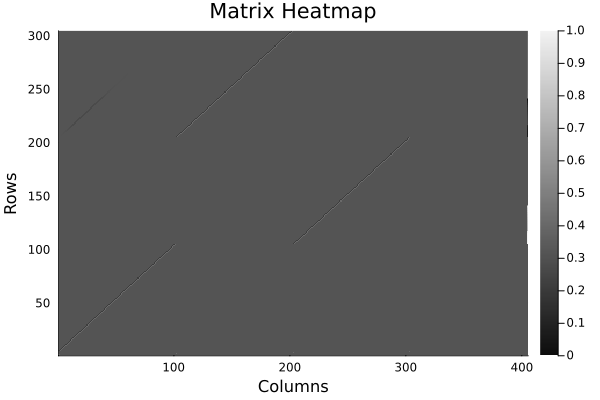

In [97]:
present_Heatmap(J)

false

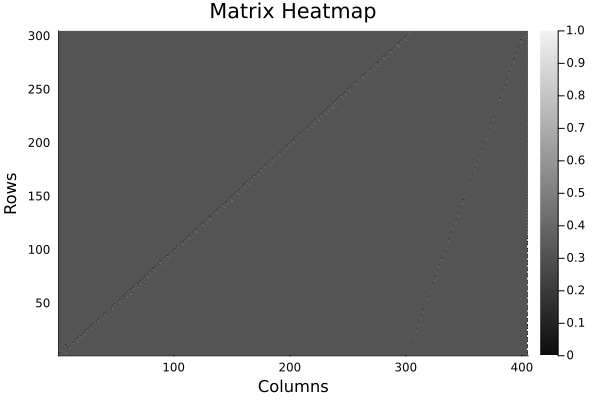

In [98]:
F = SparseArrays.SPQR.qr(J)
print(F.Q * F.R == J)
present_Heatmap(F.Q * F.R)

In [99]:
W

405×405 SparseMatrixCSC{Float64, Int64} with 3015 stored entries:
⎡⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⎥
⎣⣀⣀⣀⣀⣀⣀⣀⣀⣙⣦⣀⣀⣀⣀⣀⣀⣀⣀⣙⣦⣀⣀⣀⣀⣀⣀⣀⣀⣙⣦⣀⣀⣀⣀⣀⣀⣀⣈⣳⣄⎦

In [100]:
using LinearAlgebra
Z = nullspace(j1)
Z

405×101 Matrix{Float64}:
  0.0          0.0          0.0         …   0.0           0.0
  9.04092e-7  -1.00667e-7  -9.99456e-8     -4.82279e-8    9.58241e-7
  3.61728e-6   6.12622e-7  -4.01128e-7     -1.93695e-7    2.84791e-6
  7.13093e-6   3.15011e-6   1.22127e-7     -4.37434e-7    4.67733e-6
  1.04247e-5   6.48112e-6   2.48657e-6     -7.79383e-7    6.43351e-6
  1.3479e-5    9.57104e-6   5.63996e-6  …  -1.21846e-6    8.10618e-6
  1.6279e-5    1.24044e-5   8.53342e-6     -1.75273e-6    9.6889e-6
  1.88151e-5   1.49707e-5   1.11557e-5     -2.37971e-6    1.1178e-5
  2.10827e-5   1.72647e-5   1.35008e-5     -3.09661e-6    1.25731e-5
  2.30821e-5   1.92861e-5   1.55676e-5     -3.90061e-6    1.38746e-5
  ⋮                                     ⋱                 ⋮
  9.43839e-5   8.21787e-5   7.27815e-5     -0.000351232  -0.00116091
  9.59952e-5   8.25308e-5   7.25524e-5     -0.000340611  -0.00235005
  9.8318e-5    8.36269e-5   7.31913e-5     -0.000328687  -0.00293386
  9.61139e-5   8.06032e-5  

In [101]:
H = Z'*Symmetric(W, :L)*Z

101×101 Matrix{Float64}:
 -1.04538e-5  -9.62764e-6  -8.6753e-6   …  -8.53586e-8  -4.95105e-6
 -9.62764e-6  -9.15414e-6  -8.43129e-6      1.86691e-7  -4.51203e-6
 -8.6753e-6   -8.43129e-6  -8.06349e-6      4.20338e-7  -4.10985e-6
 -7.81671e-6  -7.57411e-6  -7.43118e-6      6.1667e-7   -3.74258e-6
 -7.04466e-6  -6.802e-6    -6.65488e-6      7.80858e-7  -3.40785e-6
 -6.3675e-6   -6.12265e-6  -5.96958e-6  …   9.1376e-7   -3.11033e-6
 -5.77592e-6  -5.52725e-6  -5.36701e-6      1.02097e-6  -2.84567e-6
 -5.26511e-6  -5.01199e-6  -4.8442e-6       1.09723e-6  -2.61082e-6
 -4.83983e-6  -4.58186e-6  -4.40629e-6      1.13619e-6  -2.40744e-6
 -4.49098e-6  -4.22731e-6  -4.04342e-6      1.15065e-6  -2.23301e-6
  ⋮                                     ⋱                ⋮
  1.60499e-7   7.03389e-7   1.1698e-6       5.16495e-6  -9.25825e-7
  1.75334e-7   7.18154e-7   1.18454e-6      5.19142e-6  -9.21872e-7
  1.7947e-7    7.22211e-7   1.18855e-6      5.21328e-6  -9.211e-7
  1.67189e-7   7.10337e-7   1.1770

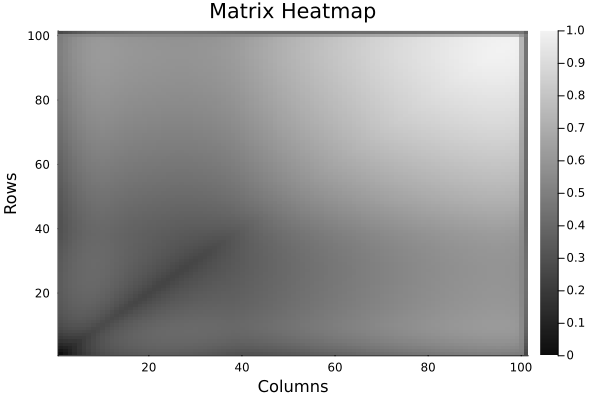

In [102]:
present_Heatmap(H)

In [103]:
J* Z

304×101 Matrix{Float64}:
  0.0           0.0           0.0          …   0.0           0.0
 -8.63127e-19   9.40207e-20   1.7199e-18      -2.59616e-18  -1.48841e-17
 -1.87618e-18  -3.66638e-18  -3.87433e-18     -2.09641e-20   5.27375e-17
 -9.20236e-18  -6.9067e-18   -5.46479e-18      1.08734e-17   1.26141e-16
 -7.74903e-21  -3.01755e-21  -1.05217e-21     -7.76557e-21   7.98395e-21
  3.42519e-20   5.79688e-21   6.20187e-20  …  -4.10943e-20  -7.69344e-20
  6.59627e-20   1.65383e-19   3.00167e-20     -1.45054e-20  -7.57472e-19
  1.38172e-19  -9.05796e-20  -1.0715e-19      -1.71233e-19  -6.67965e-20
  1.01009e-19   2.07629e-19   1.1832e-19       3.40851e-19   1.67887e-18
 -5.83182e-19  -4.99432e-19  -6.03193e-19     -2.10223e-19   3.8967e-18
  ⋮                                        ⋱                 ⋮
  2.37508e-18  -2.37169e-20   1.54838e-18  …   1.72795e-18   4.45539e-19
 -1.4569e-19    2.92057e-18  -1.3417e-18       2.53771e-18   8.52369e-18
 -2.30732e-18   1.27055e-18  -1.32476e-18    

In [104]:
eigvals(H)

101-element Vector{Float64}:
 -0.0001673358082741246
 -3.61597352688489e-5
 -1.829960883337952e-5
 -8.24841322639426e-6
 -5.697031292581218e-6
 -3.4206532171317824e-6
 -2.6566595411329986e-6
 -1.8500912244454633e-6
 -1.5182449710018632e-6
 -1.1421780432357548e-6
  ⋮
  1.5011934441815642e-7
  1.8787985357316245e-7
  2.5156174746389956e-7
  3.5055488924670536e-7
  5.480667100397051e-7
  9.556018018872175e-7
  2.147385689082915e-6
  7.710893196887865e-6
  0.0003650621185285564